# Homework #3.2: One vs. Rest

This homework is about multinomial classification using OVR technique. Do the following:

1. Get iris dataset from `sklearn` using `sklearn.datasets.load_iris()`.
2. There are 3 classes (labels): 0, 1 and 2. Peek class 0 and convert all of the zeros in $ y $ vector to one. Convert the rest labels (1s and 2s) to zero.
3. Create a `LogisticRegression` model and fit it on $ X $ and the new $ y $. Get predictions (the probabilities) from the model with `.predict_proba()` function.
4. Do steps 2 and 3 once again for class 1 and once for class 2.
5. Now you have 3 probabilities: one for class 0, one for 1 and one for 2. The real class for each data item is the maximum probability among its 3 probability. For example if data item number 5 has 0.1 probability for class 0, 0.7 for class 1 and 0.4 for class 2, its true class is 1.
6. Draw a 2D plot using `matplotlib` to show that the OVR classification works well.

For more information:  
[scikit-learn example about OVR](http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html)
(Note: in this example, it has used `LogisticRegression` once for OVR but you should use it 3 times)

[OVR - Wikipedia](https://en.wikipedia.org/wiki/Multiclass_classification#One-vs.-rest)

[Coursera Machine Learning Course - Andrew Ng](https://www.coursera.org/learn/machine-learning/lecture/68Pol/multiclass-classification-one-vs-all)

Good luck!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import  linear_model,datasets

%matplotlib inline

In [2]:
X = datasets.load_iris().data
#make 3 class

y_true =np.zeros((150,3))
y_true[:51 , 0] = 1
y_true[51:101 , 1] = 1
y_true[101:, 2] = 1

#y_t= pd.DataFrame(y_true)
y_pred = np.zeros((150,3))

In [3]:
logreg = linear_model.LogisticRegression()
proba = np.zeros((150,3))
res=np.zeros(150)
for i in range(3):
    logreg.fit(X, y_true[:,i])
    y_pred[:,i]=logreg.predict(X)
    proba[: ,i]=logreg.predict_proba(X)[:,1]
    
for j in range(150):
    res[j]=np.argmax(proba[j,:] , axis=0)
     


ValueError: Invalid RGBA argument: 'cenyior'

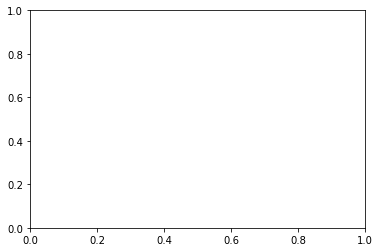

In [6]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

f, axes = plt.subplots(1, 1)
axes.set_facecolor((0,1,1))
#axes.contourf(xx, yy, y_pred.reshape(xx.shape), cmap=plt.cm.binary, alpha=.8)
axes.scatter(X[:, 0], X[:, 1], c=res, s=10, cmap=plt.cm.winter)
